In [12]:
from matplotlib import pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry as shp
from shapely.geometry import Point
from shapely.validation import explain_validity
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import scipy
from obtener_UT import MST

In [2]:
CRS_LAT_LON = "epsg:4326"
CRS_WGS84 = "EPSG:3857"
CRS_CHILE19S = "EPSG:20049"

In [3]:
colegios = pd.read_parquet('data_final.parquet', columns=['RBD', 'X', 'Y', 'Aristas', 'Logistica','Manipuladora', 'Beneficio', 'Alimentos', 'Raciones', 'Profit', 'UT', 'geometry'])

In [4]:
geometry = [Point(xy) for xy in zip(colegios.X/10**5, colegios.Y/10**5)]
colegios_gpd = gpd.GeoDataFrame(colegios, crs=CRS_CHILE19S, geometry=geometry)

In [54]:
initial_point = colegios_gpd.iloc[0].geometry.buffer(30000)


In [58]:
colegios_index = list(colegios_gpd[colegios_gpd.intersects(initial_point)].index)


In [43]:
from obtener_UT import union, find
def MST(data):
    n = len(data)
    padre = [i for i in range(n)]
    largo = [1 for _ in range(n)]
    aristas = []
    edges = [[] for _ in range(n)]

    for i in range(n):
        for j in data['Aristas'][i]:
            aristas.append([abs(data['X'][i] - data['X'][j]) + abs(data['Y'][i] - data['Y'][j]), i, j])

    aristas.sort()

    for u in aristas:
        if find(u[1], padre) != find(u[2], padre):
            union(u[1], u[2], padre, largo)
            edges[u[1]].append(u[2])
            edges[u[2]].append(u[1])

    return edges

In [44]:
mst_result = MST(colegios_gpd)


In [51]:
mst_result[4][0]

3058

In [52]:
import networkx as nx 
G = nx.Graph()
for i in range(len(mst_result)): 
 for j in range(len(mst_result[i])): 
    G.add_edge(i,mst_result[i][j]) 

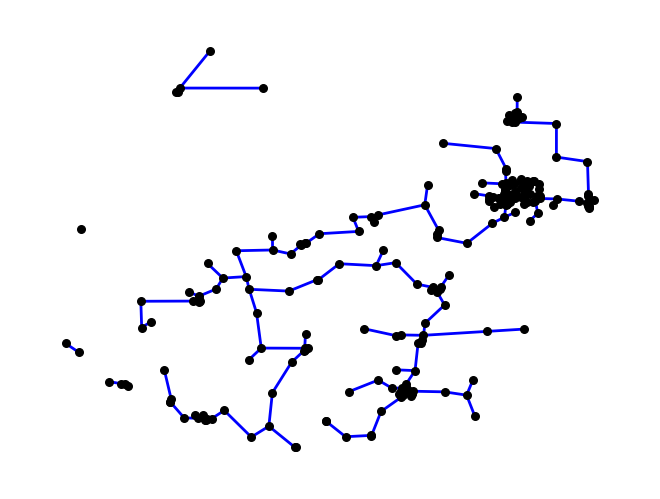

In [74]:
import matplotlib.pyplot as plt 
options = {
    'node_color': 'black',
    'node_size': 30,
    'edge_color': 'blue',
    'width': 2,
    'pos': {i:(colegios_gpd.iloc[i].X,colegios_gpd.iloc[i].Y) for i in colegios_index}
}
nx.draw( G.subgraph(colegios_index), **options) 
plt.show() 